> 판다스--melt,stack, tidydata, barplot, 해들리위컴의 그레프레이어

# 강의영상 

<https://youtube.com/playlist?list=PLQqh36zP38-wY12M2YbVZ4VveB8bj39AW>

# imports

In [ ]:
import pandas as pd
import numpy as np
from plotnine import *

# 판다스: melt, stack

### melt

`-` 설명: 

`-` 데이터

In [6]:
df=pd.read_csv('https://raw.githubusercontent.com/guebin/2021DV/master/_notebooks/phone.csv')
df

,Date,Samsung,Apple,Huawei,Xiaomi,Oppo,Mobicel,Motorola,LG,Others,Realme,Google,Nokia,Lenovo,OnePlus,Sony,Asus
0,2019-10,461,324,136,109,76,81,43,37,135,28,39,14,22,17,20,17
1,2019-11,461,358,167,141,86,61,29,36,141,27,29,20,23,10,19,27
2,2019-12,426,383,143,105,53,45,51,48,129,30,20,26,28,18,18,19
3,2020-01,677,494,212,187,110,79,65,49,158,23,13,19,19,22,27,22
4,2020-02,593,520,217,195,112,67,62,71,157,25,18,16,24,18,23,20
5,2020-03,637,537,246,187,92,66,59,67,145,21,16,24,18,31,22,14
6,2020-04,647,583,222,154,98,59,48,64,113,20,23,25,19,19,23,21
7,2020-05,629,518,192,176,91,87,50,66,150,43,27,15,18,19,19,13
8,2020-06,663,552,209,185,93,69,54,60,140,39,16,16,17,29,25,16
9,2020-07,599,471,214,193,89,78,65,59,130,40,27,25,21,18,18,12


`-` 사용예시1: 기본사용

In [7]:
df.melt()

,variable,value
0,Date,2019-10
1,Date,2019-11
2,Date,2019-12
3,Date,2020-01
4,Date,2020-02
...,...,...
216,Asus,16
217,Asus,12
218,Asus,20
219,Asus,15


- variable: column name들이 들어간다.
- value: column name에 대응하는 값들이 들어간다.

`-` 사용예시2: id_vars --> tidy data 

In [8]:
df.melt(id_vars='Date')

,Date,variable,value
0,2019-10,Samsung,461
1,2019-11,Samsung,461
2,2019-12,Samsung,426
3,2020-01,Samsung,677
4,2020-02,Samsung,593
...,...,...,...
203,2020-06,Asus,16
204,2020-07,Asus,12
205,2020-08,Asus,20
206,2020-09,Asus,15


`-` 사용예시3: 

In [9]:
df.set_index('Date').melt()

,variable,value
0,Samsung,461
1,Samsung,461
2,Samsung,426
3,Samsung,677
4,Samsung,593
...,...,...
203,Asus,16
204,Asus,12
205,Asus,20
206,Asus,15


`-` 사용예시4: ignore_index=False

In [10]:
df.set_index('Date').melt(ignore_index=False).reset_index()

,Date,variable,value
0,2019-10,Samsung,461
1,2019-11,Samsung,461
2,2019-12,Samsung,426
3,2020-01,Samsung,677
4,2020-02,Samsung,593
...,...,...,...
203,2020-06,Asus,16
204,2020-07,Asus,12
205,2020-08,Asus,20
206,2020-09,Asus,15


## stack

`-` 설명: 

In [11]:
df=pd.read_csv('https://raw.githubusercontent.com/PacktPublishing/Pandas-Cookbook/master/data/flights.csv')\
.groupby(["AIRLINE","WEEKDAY"]).agg({"CANCELLED":[np.mean,"count"],"DIVERTED":[np.mean,"count"]})
df

CANCELLED        DIVERTED      
                     mean count      mean count
AIRLINE WEEKDAY                                
AA      1        0.032106  1277  0.004699  1277
        2        0.007341  1226  0.001631  1226
        3        0.011949  1339  0.001494  1339
        4        0.015004  1333  0.003751  1333
        5        0.014151  1272  0.000786  1272
...                   ...   ...       ...   ...
WN      3        0.014118  1275  0.001569  1275
        4        0.007911  1264  0.003165  1264
        5        0.005828  1201  0.000000  1201
        6        0.010132   987  0.003040   987
        7        0.006066  1154  0.002600  1154

[98 rows x 4 columns]

`-` 사용예시1

In [12]:
df.stack()

CANCELLED     DIVERTED
AIRLINE WEEKDAY                                
AA      1       mean      0.032106     0.004699
                count  1277.000000  1277.000000
        2       mean      0.007341     0.001631
                count  1226.000000  1226.000000
        3       mean      0.011949     0.001494
...                            ...          ...
WN      5       count  1201.000000  1201.000000
        6       mean      0.010132     0.003040
                count   987.000000   987.000000
        7       mean      0.006066     0.002600
                count  1154.000000  1154.000000

[196 rows x 2 columns]

`-` 사용예시2

In [13]:
df.stack().stack().reset_index().rename({0:'value'},axis=1)
#df.stack().stack().reset_index().rename(columns={'level_2':'aggtype'})

,AIRLINE,WEEKDAY,level_2,level_3,value
0,AA,1,mean,CANCELLED,0.032106
1,AA,1,mean,DIVERTED,0.004699
2,AA,1,count,CANCELLED,1277.000000
3,AA,1,count,DIVERTED,1277.000000
4,AA,2,mean,CANCELLED,0.007341
...,...,...,...,...,...
387,WN,6,count,DIVERTED,987.000000
388,WN,7,mean,CANCELLED,0.006066
389,WN,7,mean,DIVERTED,0.002600
390,WN,7,count,CANCELLED,1154.000000


`-` 사용예시3 (unstack)

In [14]:
df.stack().unstack()

CANCELLED          DIVERTED        
                     mean   count      mean   count
AIRLINE WEEKDAY                                    
AA      1        0.032106  1277.0  0.004699  1277.0
        2        0.007341  1226.0  0.001631  1226.0
        3        0.011949  1339.0  0.001494  1339.0
        4        0.015004  1333.0  0.003751  1333.0
        5        0.014151  1272.0  0.000786  1272.0
...                   ...     ...       ...     ...
WN      3        0.014118  1275.0  0.001569  1275.0
        4        0.007911  1264.0  0.003165  1264.0
        5        0.005828  1201.0  0.000000  1201.0
        6        0.010132   987.0  0.003040   987.0
        7        0.006066  1154.0  0.002600  1154.0

[98 rows x 4 columns]

> melt, stack 을 set_index와 reset_index와 함께 사용하면 tidydata를 만들기 용이하다. 

# tidydata

## tidydata의 정의 

`-` 느낌: ggplot으로 그림 그리기 좋은 데이터 + pandas로 query, group by 등을 쓰기 좋은 자료 

`-` 정의: https://r4ds.had.co.nz/tidy-data.html

- Each variable must have its own column.
- Each observation must have its own row.
- Each value must have its own cell.

예시1 (tidy data) 

|obs|x|y|shape|color|
|:-:|:-:|:-:|:-:|:-:|
|0|0|0 |'star'|'F'|
|1|0|1 |'circ'|'F'|
|2|1|0 |'star'|'M'|
|3|1|1 |'circ'|'M'|

예시2 (tidy data x)

| |shape=star|shape=circ|
|:-:|:-:|:-:|
|color=F|(0,0)|(0,1)|
|color=M|(1,0)|(1,1)|



## 예제1: wide df

`-` data

In [740]:
df=pd.read_csv('https://raw.githubusercontent.com/guebin/2021DV/master/_notebooks/phone.csv')
df

,Date,Samsung,Apple,Huawei,Xiaomi,Oppo,Mobicel,Motorola,LG,Others,Realme,Google,Nokia,Lenovo,OnePlus,Sony,Asus
0,2019-10,461,324,136,109,76,81,43,37,135,28,39,14,22,17,20,17
1,2019-11,461,358,167,141,86,61,29,36,141,27,29,20,23,10,19,27
2,2019-12,426,383,143,105,53,45,51,48,129,30,20,26,28,18,18,19
3,2020-01,677,494,212,187,110,79,65,49,158,23,13,19,19,22,27,22
4,2020-02,593,520,217,195,112,67,62,71,157,25,18,16,24,18,23,20
5,2020-03,637,537,246,187,92,66,59,67,145,21,16,24,18,31,22,14
6,2020-04,647,583,222,154,98,59,48,64,113,20,23,25,19,19,23,21
7,2020-05,629,518,192,176,91,87,50,66,150,43,27,15,18,19,19,13
8,2020-06,663,552,209,185,93,69,54,60,140,39,16,16,17,29,25,16
9,2020-07,599,471,214,193,89,78,65,59,130,40,27,25,21,18,18,12


- tidy data 아님
- 정의에 의한 판단: 하나의 observation이 하나의 행을 차지하고 있지 않음. 
- 직관적인 판단: 회사별로 색을 다르게 하여 x:'Date', y:'판매량'을 하고 싶다면? 

`-` tidydata로 변환 (melt는 너무 쉬우니까 stack으로 해보자)

In [747]:
df.set_index('Date').stack().reset_index().rename({'level_1':'Company',0:'Sales'},axis=1)

,Date,Company,Sales
0,2019-10,Samsung,461
1,2019-10,Apple,324
2,2019-10,Huawei,136
3,2019-10,Xiaomi,109
4,2019-10,Oppo,76
...,...,...,...
203,2020-10,Nokia,20
204,2020-10,Lenovo,22
205,2020-10,OnePlus,9
206,2020-10,Sony,22


## 예제2: multi-indexed data

`-` 데이터

In [748]:
df=pd.read_csv('https://raw.githubusercontent.com/PacktPublishing/Pandas-Cookbook/master/data/flights.csv')\
.groupby(["AIRLINE","WEEKDAY"]).agg({"CANCELLED":[np.mean,"count"],"DIVERTED":[np.mean,"count"]})
df

CANCELLED        DIVERTED      
                     mean count      mean count
AIRLINE WEEKDAY                                
AA      1        0.032106  1277  0.004699  1277
        2        0.007341  1226  0.001631  1226
        3        0.011949  1339  0.001494  1339
        4        0.015004  1333  0.003751  1333
        5        0.014151  1272  0.000786  1272
...                   ...   ...       ...   ...
WN      3        0.014118  1275  0.001569  1275
        4        0.007911  1264  0.003165  1264
        5        0.005828  1201  0.000000  1201
        6        0.010132   987  0.003040   987
        7        0.006066  1154  0.002600  1154

[98 rows x 4 columns]

- tidy data 아님
- 정의에 의한 판단: 하나의 셀에 여러 관측치가 있음 (표안의 표 느낌)
- 직관적인 판단: WEEKDAY == 4 and mean(CANCELLED) > 0.001 인 자료를 뽑고 싶다면? 

`-` tidydata로 변환 (stack으로 풀면 너무 쉬우니까 melt로 해보자)

In [753]:
df.melt(ignore_index=False).reset_index()

,AIRLINE,WEEKDAY,variable_0,variable_1,value
0,AA,1,CANCELLED,mean,0.032106
1,AA,2,CANCELLED,mean,0.007341
2,AA,3,CANCELLED,mean,0.011949
3,AA,4,CANCELLED,mean,0.015004
4,AA,5,CANCELLED,mean,0.014151
...,...,...,...,...,...
387,WN,3,DIVERTED,count,1275.000000
388,WN,4,DIVERTED,count,1264.000000
389,WN,5,DIVERTED,count,1201.000000
390,WN,6,DIVERTED,count,987.000000


# barplot 

In [835]:
df = pd.read_csv('https://raw.githubusercontent.com/guebin/DV2021/master/_notebooks/2021-10-25-FIFA22_official_data.csv')\
.query('Nationality=="Korea Republic" or Nationality=="Japan"')\
[['Nationality','Overall','Age']].reset_index(drop=True)
df

,Nationality,Overall,Age
0,Korea Republic,89,28
1,Japan,77,28
2,Japan,73,28
3,Korea Republic,72,31
4,Japan,71,28
...,...,...,...
456,Japan,59,21
457,Korea Republic,60,21
458,Japan,54,17
459,Korea Republic,51,20


## geom_col

`-` 예시1: 한국과 일본의 평균능력치 비교

In [765]:
data=df.groupby('Nationality').agg({'Overall':np.mean}).reset_index()
data

,Nationality,Overall
0,Japan,66.478873
1,Korea Republic,65.457627


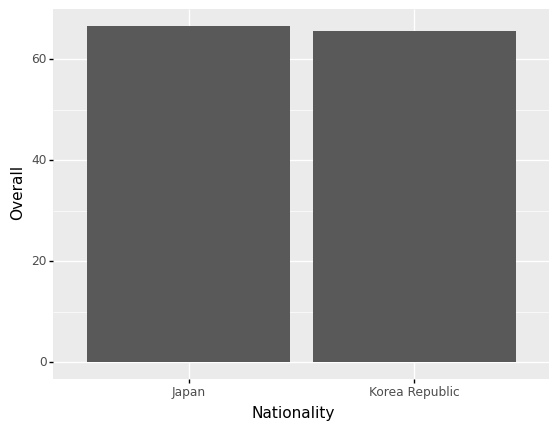

<ggplot: (8739001076625)>

In [766]:
ggplot(data)+geom_col(aes(x='Nationality',y='Overall'))

`-` 예시2: 한국과 일본의 평균능력치 비교 (색상변경) 

In [767]:
data=df.groupby('Nationality').agg({'Overall':np.mean}).reset_index()
data

,Nationality,Overall
0,Japan,66.478873
1,Korea Republic,65.457627


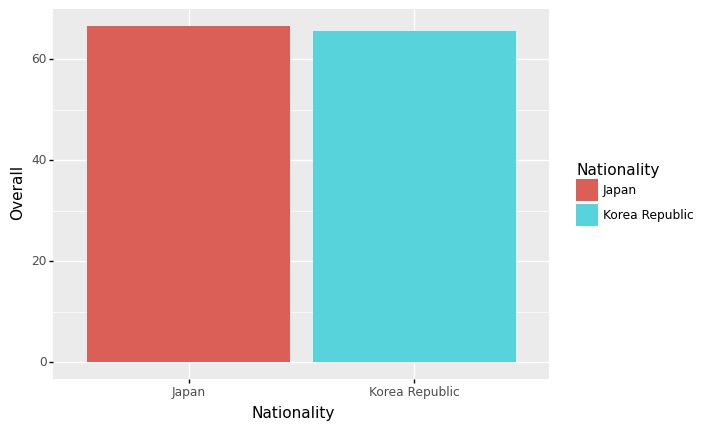

<ggplot: (8739001430581)>

In [769]:
ggplot(data)+geom_col(aes(x='Nationality',y='Overall',fill='Nationality'))
#ggplot(data)+geom_col(aes(x='Nationality',y='Overall',color='Nationality'))

`-` 예시3: 한국과 일본의 평균연령 비교

In [770]:
data=df.groupby('Nationality').agg({'Age':np.mean}).reset_index()
data

,Nationality,Age
0,Japan,26.084507
1,Korea Republic,27.158192


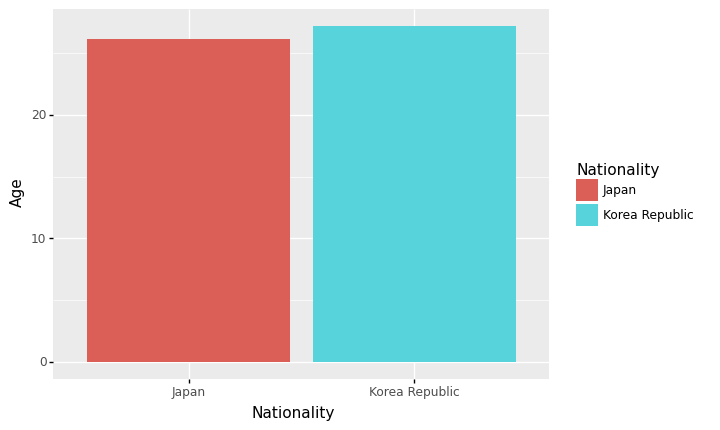

<ggplot: (8739000939717)>

In [772]:
ggplot(data)+geom_col(aes(x='Nationality',y='Age',fill='Nationality'))

## geom_col + position='dodge'

`-` 예시1: 한국과 일본의 평균연령+평균능력치 비교

In [786]:
data=df.groupby('Nationality').agg({'Overall':np.mean,'Age':np.mean})\
.stack().reset_index().rename({0:'value'},axis=1)
data

,Nationality,level_1,value
0,Japan,Overall,66.478873
1,Japan,Age,26.084507
2,Korea Republic,Overall,65.457627
3,Korea Republic,Age,27.158192


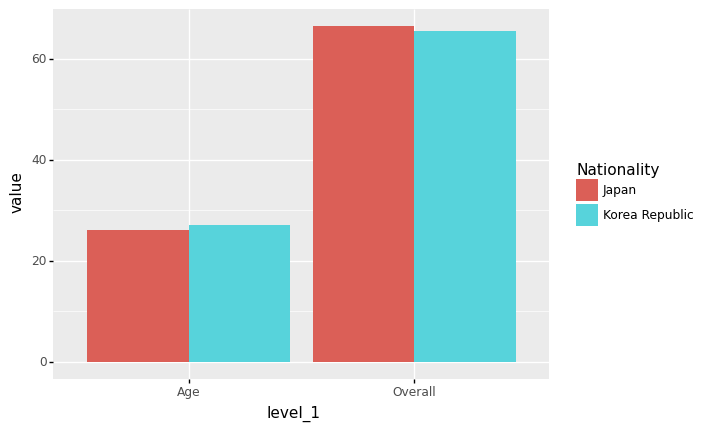

<ggplot: (8739004389489)>

In [788]:
ggplot(data)+geom_col(aes(x='level_1',fill='Nationality',y='value'),position='dodge')

## geom_col + coord_flip()

`-` 예시1: 한국과 일본의 평균연령+평균능력치 비교 (90도회전)

In [789]:
data=df.groupby('Nationality').agg({'Overall':np.mean,'Age':np.mean})\
.stack().reset_index().rename({0:'value'},axis=1)
data

,Nationality,level_1,value
0,Japan,Overall,66.478873
1,Japan,Age,26.084507
2,Korea Republic,Overall,65.457627
3,Korea Republic,Age,27.158192


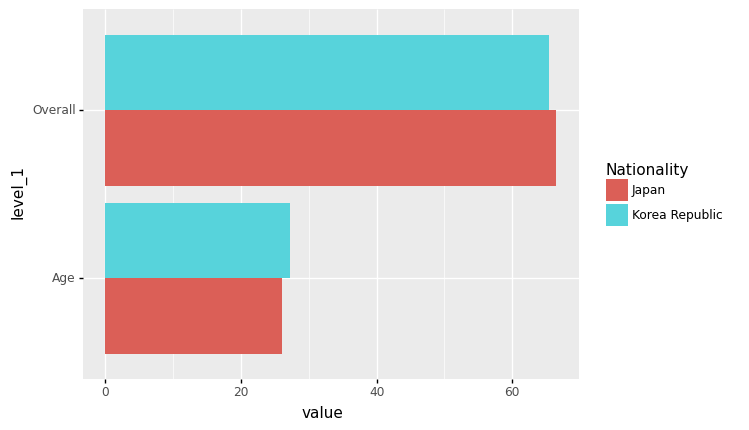

<ggplot: (8739001299161)>

In [790]:
ggplot(data)+geom_col(aes(x='level_1',fill='Nationality',y='value'),position='dodge')\
+coord_flip()

## geom_col + facet_wrap(var)

`-` 예시1: 한국과 일본의 평균연령+평균능력치 비교 (면분할)

In [791]:
data=df.groupby('Nationality').agg({'Overall':np.mean,'Age':np.mean})\
.stack().reset_index().rename({0:'value'},axis=1)
data

,Nationality,level_1,value
0,Japan,Overall,66.478873
1,Japan,Age,26.084507
2,Korea Republic,Overall,65.457627
3,Korea Republic,Age,27.158192


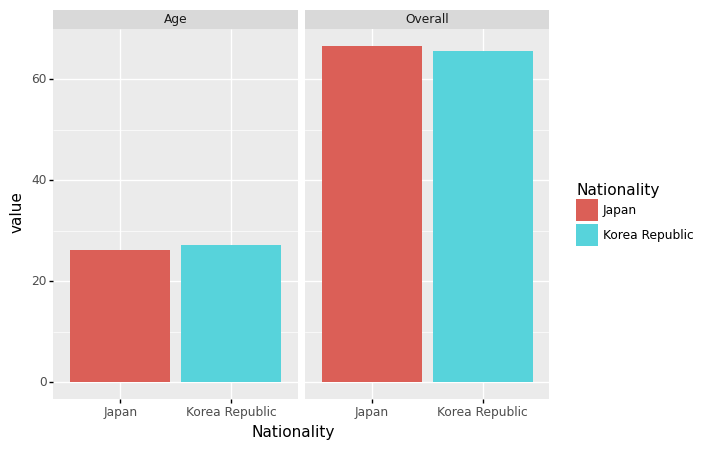

<ggplot: (8739001171105)>

In [795]:
ggplot(data)+geom_col(aes(x='Nationality',fill='Nationality',y='value'),position='dodge')\
+facet_wrap('level_1')

`-` 예시2: 한국과 일본의 평균연령+평균능력치 비교 (면분할)

In [796]:
data=df.groupby('Nationality').agg({'Overall':np.mean,'Age':np.mean})\
.stack().reset_index().rename({0:'value'},axis=1)
data

,Nationality,level_1,value
0,Japan,Overall,66.478873
1,Japan,Age,26.084507
2,Korea Republic,Overall,65.457627
3,Korea Republic,Age,27.158192


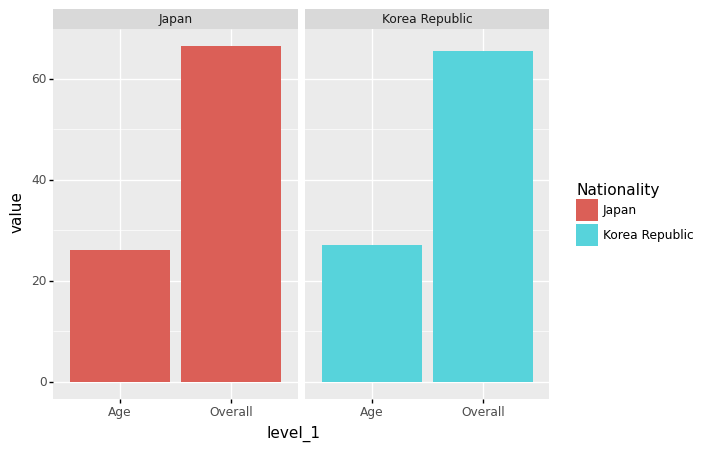

<ggplot: (8739005005861)>

In [797]:
ggplot(data)+geom_col(aes(x='level_1',fill='Nationality',y='value'),position='dodge')\
+facet_wrap('Nationality')

## geom_col + facet_grid('var_y ~ var_x')

`-` 예시1: 한국과 일본의 평균연령+평균능력치+최대능력치 비교 (면분할)

In [808]:
data=df.groupby('Nationality').agg({'Overall':[np.mean,np.max],'Age':np.mean})\
.melt(ignore_index=False).reset_index()
data

,Nationality,variable_0,variable_1,value
0,Japan,Overall,mean,66.478873
1,Korea Republic,Overall,mean,65.457627
2,Japan,Overall,amax,79.000000
3,Korea Republic,Overall,amax,89.000000
4,Japan,Age,mean,26.084507
5,Korea Republic,Age,mean,27.158192


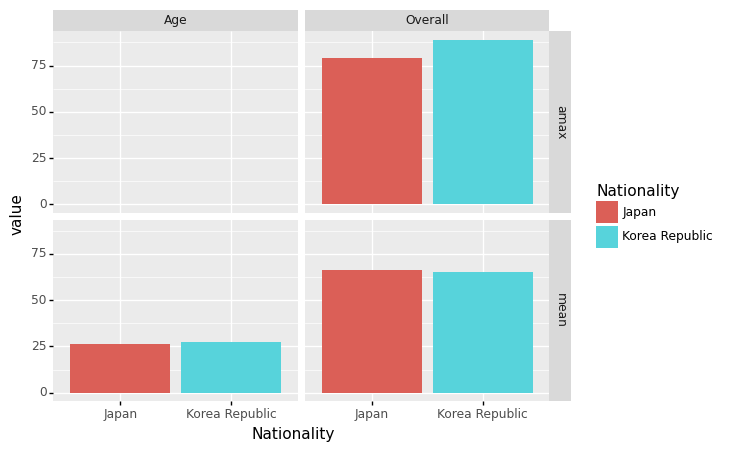

<ggplot: (8739001454385)>

In [811]:
ggplot(data)+geom_col(aes(fill='Nationality',x='Nationality',y='value'),position='dodge')\
+facet_grid('variable_1~variable_0')

## geom_bar vs geom_col

`-` 예시1: 한국과 일본의 단순 선수 숫자 비교 (with goem_col)

In [820]:
data=df.groupby('Nationality').agg({'Age':'count'}).reset_index().rename({'Age':'count'},axis=1)
data

,Nationality,count
0,Japan,284
1,Korea Republic,177


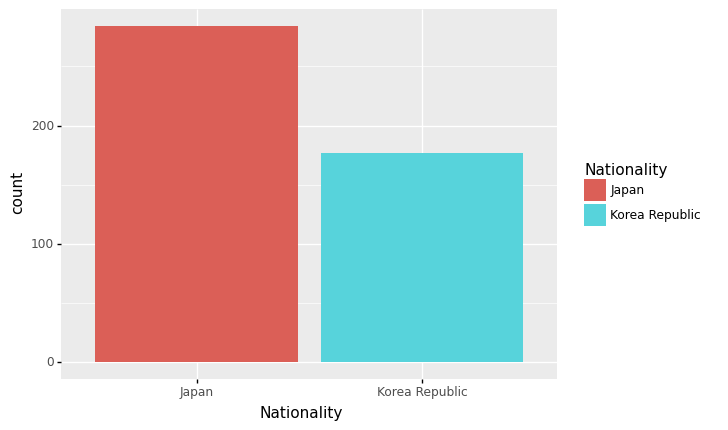

<ggplot: (8739001309845)>

In [821]:
ggplot(data)+geom_col(aes(x='Nationality',fill='Nationality',y='count'))

`-` 예시2: 한국과 일본의 단순 선수 숫자 비교 (with goem_bar)

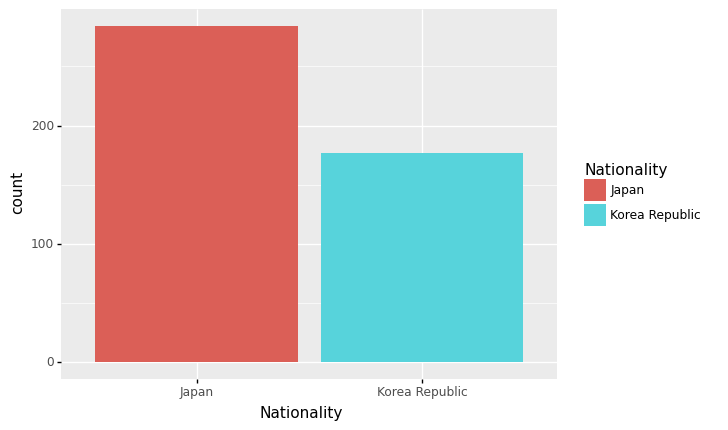

<ggplot: (8739003315533)>

In [823]:
ggplot(df)+geom_bar(aes(x='Nationality',fill='Nationality'))

- 특징1: 원래 데이터프레임 그대로 하는게 아니라 뭔가 변형된 값이 출력 (정확하게는 groupby + count가 변형요소) 
- 특징2: y는 당연히 count이므로 y를 명시할 필요가 없음. (잘 생각해보면 명시하고 싶어도 명시할 수 없음, y는 groupby + count 에 의해서 계산된 값이고 df자체에는 존재하지 않음) 

`-` 이렇게 약속된 변형은 `stat='count'` 옵션 때문에 가능함 

- stat='count'는 그룹바이이후에 count를 하라는 의미

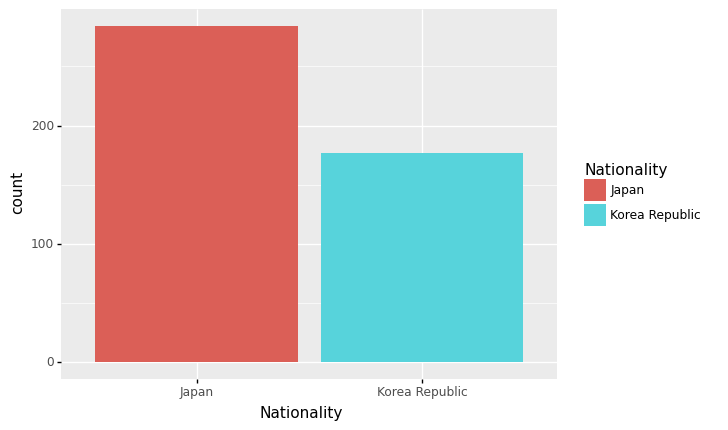

<ggplot: (8739005443049)>

In [836]:
ggplot(df)+geom_bar(aes(x='Nationality',fill='Nationality'),stat='count')

`-` `stat='identity'` 로 옵션을 바꾸면 약속된 변환이 수행되지 않음 

- stat='identity'는 아무 변환도 하지말라는 의미

In [837]:
ggplot(df)+geom_bar(aes(x='Nationality',fill='Nationality'),stat='identity')

KeyError: 'y'

- 에러가난다. 

(참고) 사실 아래의 3개의 코드가 모두 같다. <-- 수업시간에 설명 X

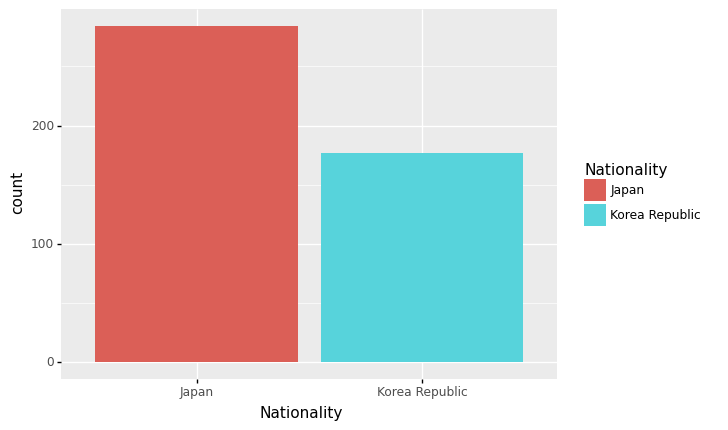

<ggplot: (8739004080929)>

In [839]:
ggplot(df)+geom_bar(aes(x='Nationality',y='..count..',fill='Nationality'),stat='count')
ggplot(df)+geom_bar(aes(x='Nationality',fill='Nationality'),stat='count') # y='..count..' 생략,
ggplot(df)+geom_bar(aes(x='Nationality',fill='Nationality')) # y='..count..' 생략, stat='count' 생략

## geom_bar()의 불편한점 

`-` 사실 편하라고 만든것 같은데, 그닥 편하지 않음. 

- 편하라고 만든 점1: groupby를 자동으로 해줘서 groupby를 못하는 유저들이 사용하기 편리하게 함 -> 그런데 우리는 groupby 잘함
- 편하라고 만든 점2: groupby이후 count연산을 알아서 해줌 -> 그런데 count연산만 알아서해주고 그 이외의 연산은 잘 지원안됨 

`-` 결론: groupby + count 조합에서만 편리하고 나머지는 편하지 않다. 

`-` 불편한 예시: 나라별 overall의 평균을 geom_bar()로 플랏해보라. 

In [827]:
data= df.groupby('Nationality').agg({'Overall':np.mean}).reset_index()
data

,Nationality,Overall
0,Japan,66.478873
1,Korea Republic,65.457627


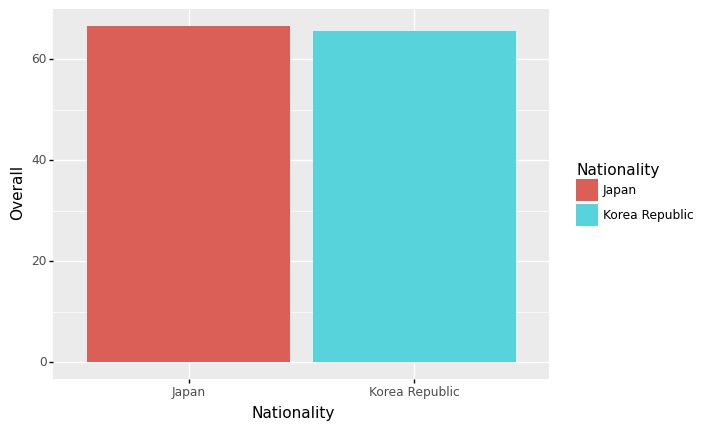

<ggplot: (8738999896737)>

In [833]:
ggplot(data)+geom_bar(aes(x='Nationality',y='Overall',fill='Nationality'),stat='identity')
ggplot(data)+geom_col(aes(x='Nationality',y='Overall',fill='Nationality'))

# 해들리위컴의 그래프레이어

ref: <https://byrneslab.net/classes/biol607/readings/wickham_layered-grammar.pdf>

`-` data + aes + geom + position + stat + coord + facet

- data: pandas dataframe 
- aes: x, y, color/fill, size, alpha, ...
- geom: point, col/bar, line/smooth, ... 
- position: jitter, dodge, ...
- stat: identity, count, ...
- coord: coord_flip()
- facet: facet_wrap(), facet_grid()

`-` 해들리위컴의 주장: ggplot2는 자료가 tidydata형태로 정리되어 있을경우 해들리위컴의 그래프레이어에 따라 시각화하는 최상의 툴이다.

`-` 내 생각

- 해들리위컴의 그래프레이어는 tabular data에 한정하여 맞는 개념임 (그런데 요즘은 안 그런 데이터도 있어) 
- tabular data라고 할지라도 ggplot2의 보다 좀 더 좋은 시각화 툴이 개발되었다고 생각 (plotly 등) 

# HW

In [15]:
df = pd.read_csv('https://raw.githubusercontent.com/guebin/DV2022/master/posts/HRDataset_v14.csv')
df

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,"Woodson, Jason",10135,0,0,1,1,5,3,0,65893,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,4.07,4,0,2/28/2019,0,13
307,"Ybarra, Catherine",10301,0,0,0,5,5,1,0,48513,...,Brannon Miller,12.0,Google Search,PIP,3.20,2,0,9/2/2015,5,4
308,"Zamora, Jennifer",10010,0,0,0,1,3,4,0,220450,...,Janet King,2.0,Employee Referral,Exceeds,4.60,5,6,2/21/2019,0,16
309,"Zhou, Julia",10043,0,0,0,1,3,3,0,89292,...,Simon Roup,4.0,Employee Referral,Fully Meets,5.00,3,5,2/1/2019,0,11


(1) 성별(Sex) 평균급여(Salary)를 구하고 아래의 지침에 따라 시각화 하라. 
- barplot으로 시각화
- 성별을 색깔과 x축으로 구분 
- 평균급여는 y축으로 구분 

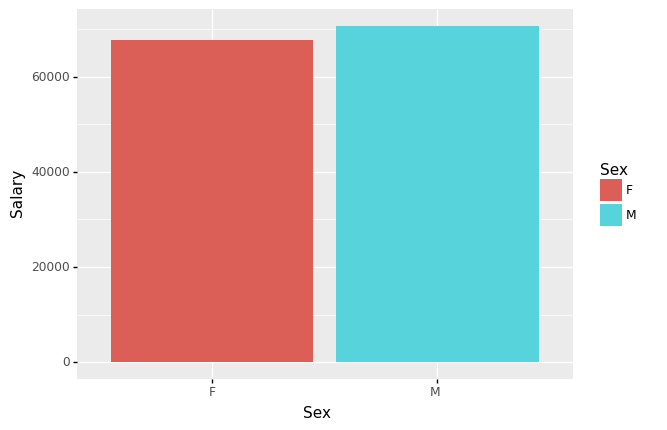

<ggplot: (8739012107149)>

In [849]:
# 시각화예시

(2) 성별(Sex)/인종별(RaceDesc) 평균급여(Salary)를 구하고 아래의 지침에 따라 시각화 하라. 

- barplot으로 시각화
- 인종은 면분할로 구분
- 성별은 x축과 색깔로 구분 
- 평균급여는 y축으로 구분 

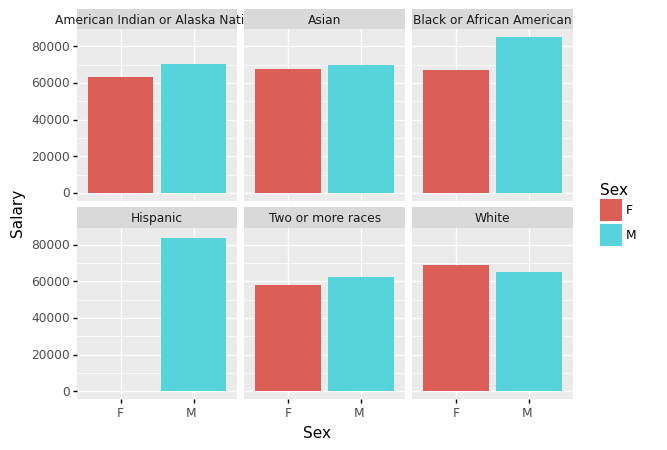

<ggplot: (8739000805601)>

In [885]:
# 시각화예시